# AI Observer - training

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *
import torch
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='GeForce RTX 2060', major=7, minor=5, total_memory=5926MB, multi_processor_count=30)

## Genera

In [23]:
bs = 32

In [5]:
path = Path("/home/alan/Desktop/personal_professional/fastai/mushroom_classifier")

In [6]:
ds_tfms = get_transforms(flip_vert=True, max_rotate=45.)

In [7]:
data = (ImageList.from_csv(path / "images/320",
                          "../../resources/ds9_min5img.csv", cols="image_id",
                          suffix='.jpg')
        .split_from_df("is_validation")
        .label_from_df("text_name")
        .transform(tfms=ds_tfms, size=300)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [7]:
print(data.classes)

['Abortiporus', 'Abrothallus', 'Acanthobasidium', 'Acanthophysellum', 'Acarospora', 'Acervus', 'Achroomyces', 'Acrocordia', 'Acrospermum', 'Aculops', 'Aecidium', 'Aegerita', 'Agaricus', 'Agrocybe', 'Ahtiana', 'Ainoa', 'Akanthomyces', 'Albatrellus', 'Alboleptonia', 'Alectoria', 'Alessioporus', 'Aleuria', 'Aleurodiscus', 'Algae', 'Allocetraria', 'Alloclavaria', 'Allodus', 'Allopsalliota', 'Allotropa', 'Alnicola', 'Alpova', 'Alternaria', 'Alyxoria', 'Amandinea', 'Amanita', 'Amauroderma', 'Amaurodon', 'Amphinema', 'Ampulloclitocybe', 'Amylocorticium', 'Amylocystis', 'Amylosporus', 'Amylostereum', 'Amyloxenasma', 'Anaptychia', 'Angelina', 'Anisomeridium', 'Annulohypoxylon', 'Anteaglonium', 'Anthostoma', 'Anthracobia', 'Anthracophyllum', 'Antrodia', 'Antrodiella', 'Anzia', 'Aphanobasidium', 'Aphroditeola', 'Apioperdon', 'Apiosporina', 'Aporpium', 'Arachnion', 'Arachnopeziza', 'Arcangeliella', 'Arcyria', 'Armillaria', 'Armillariella', 'Arrhenia', 'Arthonia', 'Arthopyrenia', 'Arthothelium', 'A

In [8]:
data.c

1493

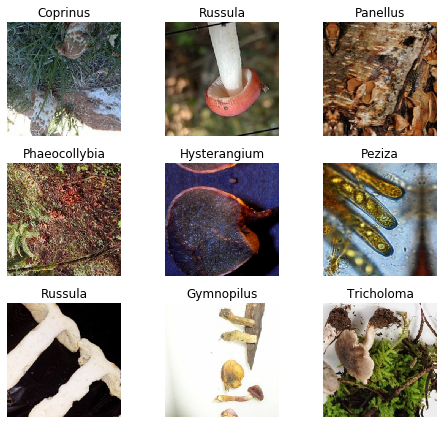

In [9]:
data.show_batch(rows=3, figsize=(7, 6))

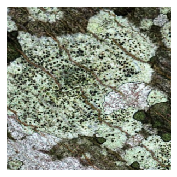

In [43]:
data.train_ds[3][0].show()

## Training

### Resnet 50

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])

In [79]:
# learn = load_learner("/home/alan/Desktop/personal_professional/fastai/mushroom_api/models/", "stage-2_resnet34.pkl")

In [80]:
# import PIL
# from fastai.vision.image import pil2tensor, Image
# image = Image(pil2tensor(PIL.Image.open("/home/alan/Desktop/Trametes_versicolor.JPG").convert("RGB"),
#                          np.float32).div_(255)).resize(224)
# # image = open_image("/home/alan/Desktop/Trametes_versicolor.JPG").resize(224)
# learn.predict(image)

In [81]:
# image

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.26E-06
Min loss divided by 10: 5.01E-06


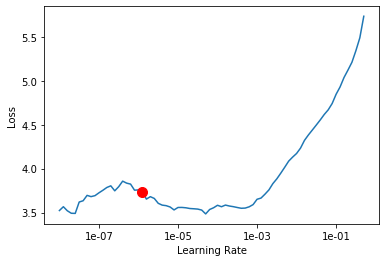

In [15]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [11]:
learn.fit_one_cycle(1, max_lr=1e-3)

In [12]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-5))

### Resnet 18

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-02
Min loss divided by 10: 5.01E-03


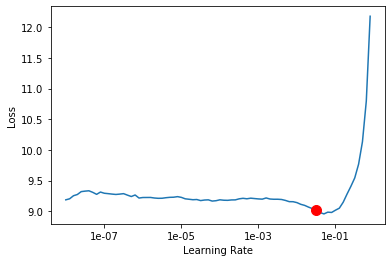

In [9]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [10]:
learn.fit_one_cycle(1, max_lr=1e-3)

In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-08
Min loss divided by 10: 5.01E-05


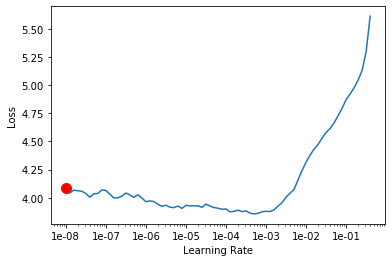

In [12]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [13]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-5))

In [14]:
learn.save("../../../resources/models/resnet18_ds9_min5img")

### Resnet 34

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-03
Min loss divided by 10: 6.31E-03


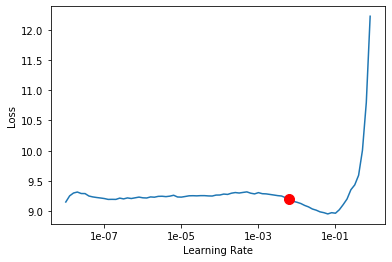

In [16]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [17]:
learn.fit_one_cycle(1, max_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.26E-08
Min loss divided by 10: 1.58E-09


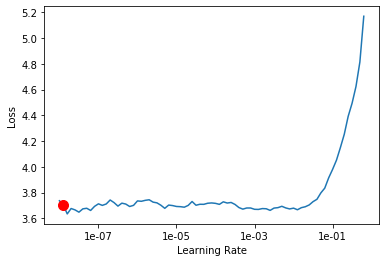

In [18]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [19]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 1.26E-05


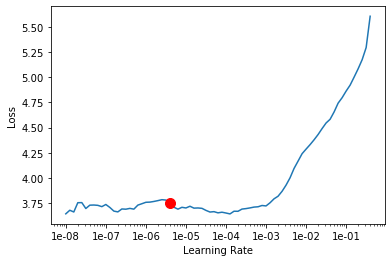

In [20]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [21]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-5))

In [22]:
learn.save("../../../resources/models/resnet34_ds9_min5img")

## Species

In [3]:
bs = 32

In [4]:
path = Path("/home/alan/Desktop/personal_professional/fastai/mushroom_classifier")

In [5]:
ds_tfms = get_transforms(flip_vert=True, max_rotate=45.)

In [6]:
data = (ImageList.from_csv(path / "images/320",
                          "../../resources/ds4_min10obs.csv", cols="image_id",
                          suffix='.jpg')
        .split_from_df("is_validation")
        .label_from_df("preferred_name")
        .transform(tfms=ds_tfms, size=300)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [7]:
print(data.classes)

['Abortiporus biennis', 'Acarospora obpallens', 'Acarospora schleicheri', 'Acarospora socialis', 'Acrocordia conoidea', 'Agaricus "tawny-gold"', 'Agaricus abruptibulbus', 'Agaricus albolutescens', 'Agaricus arorae', 'Agaricus arvensis', 'Agaricus augustus', 'Agaricus auricolor', 'Agaricus bernardi', 'Agaricus bisporus', 'Agaricus bitorquis', 'Agaricus brunneofibrillosus', 'Agaricus californicus', 'Agaricus campestris', 'Agaricus crocodilinus', 'Agaricus cupreobrunneus', 'Agaricus deardorffensis', 'Agaricus deserticola', 'Agaricus didymus', 'Agaricus diminutivus', 'Agaricus endoxanthus', 'Agaricus fuscovelatus', 'Agaricus haemorrhoidarius', 'Agaricus hondensis', 'Agaricus inapertus', 'Agaricus incultorum', 'Agaricus kerriganii', 'Agaricus leptocaulis', 'Agaricus lilaceps', 'Agaricus micromegethus', 'Agaricus moelleri', 'Agaricus moronii', 'Agaricus placomyces', 'Agaricus pocillator', 'Agaricus semotus', 'Agaricus smithii', 'Agaricus subrufescens', 'Agaricus subrutilescens', 'Agaricus sy

In [8]:
data.c

2894

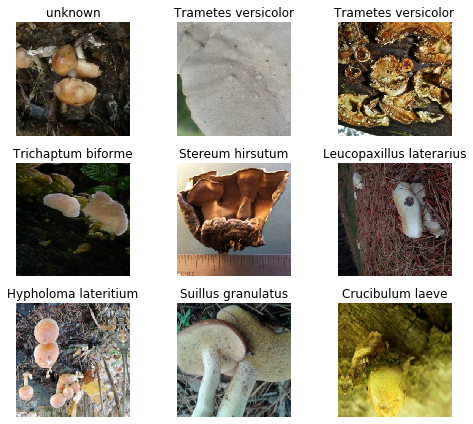

In [9]:
data.show_batch(rows=3, figsize=(7, 6))

### Training

#### Resnet 18

In [10]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.94E-08
Min loss divided by 10: 7.94E-03


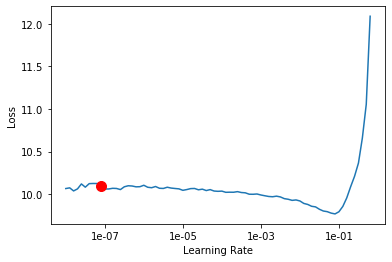

In [11]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [12]:
learn.fit_one_cycle(1, max_lr=1e-3)

In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.00E-09


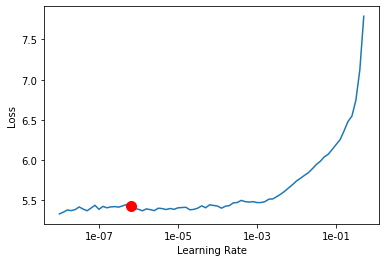

In [14]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-5))

In [16]:
learn.save("../../../resources/models/resnet18_ds4_min10obs")

In [20]:
with open("/home/alan/Desktop/personal_professional/fastai/mushroom_classifier/resources/models"
          "/resnet18_ds4_min10obs.pkl", "wb") as handle: 
    learn.export(handle)

#### Resnet 34

In [38]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-08
Min loss divided by 10: 6.31E-03


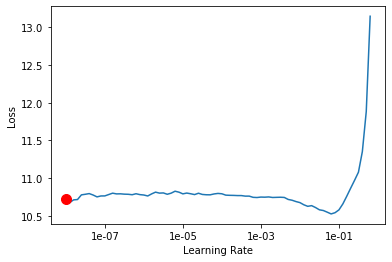

In [39]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [41]:
learn.fit_one_cycle(1, max_lr=1e-3)

In [42]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-08
Min loss divided by 10: 5.01E-05


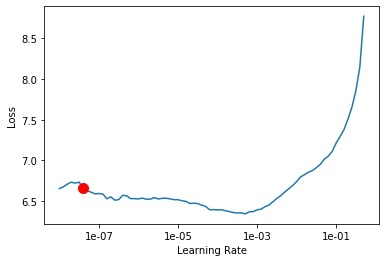

In [43]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [44]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-5))

In [45]:
learn.save("../../../resources/models/resnet34_ds4_min5img")

#### Resnet 50

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-04
Min loss divided by 10: 1.00E-09


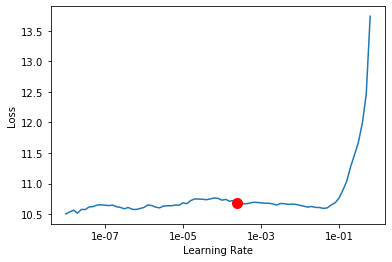

In [11]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [12]:
learn.fit_one_cycle(1, max_lr=1e-3)

In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.94E-06
Min loss divided by 10: 1.00E-09


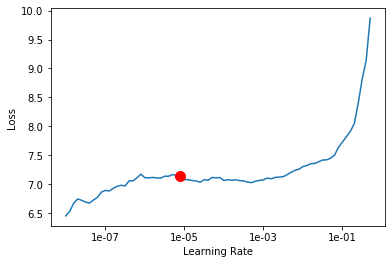

In [14]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot(suggestion=True)

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-7, 1e-5))

In [16]:
learn.save("../../../resources/models/resnet50_ds4_min5img")

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

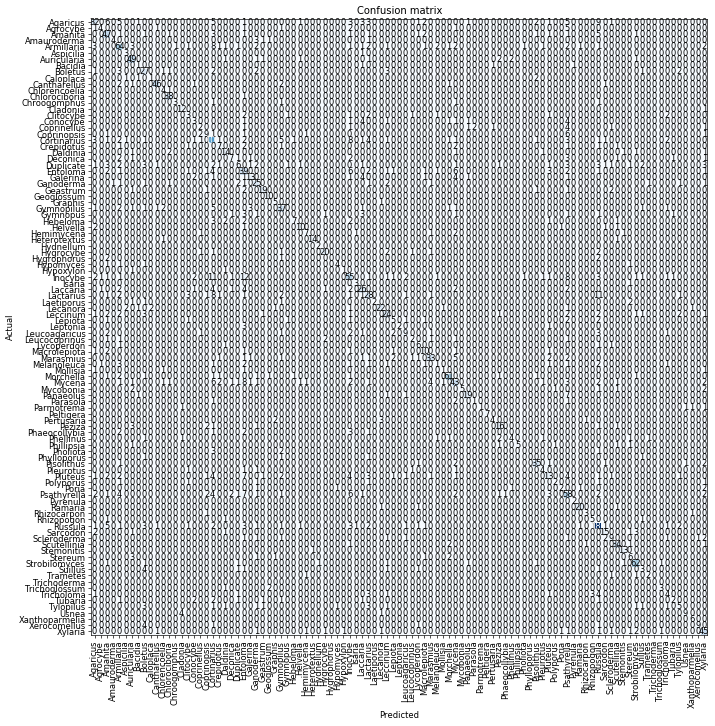

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused()

[('Inocybe', 'Entoloma', 12),
 ('Inocybe', 'Cortinarius', 11),
 ('Lactarius', 'Russula', 11),
 ('Agaricus', 'Russula', 9),
 ('Armillaria', 'Cortinarius', 8),
 ('Cortinarius', 'Inocybe', 8),
 ('Inocybe', 'Psathyrella', 8),
 ('Lactarius', 'Cortinarius', 8),
 ('Mycena', 'Entoloma', 8),
 ('Panaeolus', 'Psathyrella', 7),
 ('Pluteus', 'Entoloma', 7),
 ('Psathyrella', 'Entoloma', 7),
 ('Agaricus', 'Amanita', 6),
 ('Coprinopsis', 'Psathyrella', 6),
 ('Entoloma', 'Inocybe', 6),
 ('Entoloma', 'Mycena', 6),
 ('Mycena', 'Cortinarius', 6),
 ('Psathyrella', 'Inocybe', 6),
 ('Agaricus', 'Armillaria', 5),
 ('Agaricus', 'Cortinarius', 5),
 ('Agaricus', 'Psathyrella', 5),
 ('Agrocybe', 'Psathyrella', 5),
 ('Amanita', 'Russula', 5),
 ('Cortinarius', 'Gymnopilus', 5),
 ('Gymnopilus', 'Cortinarius', 5),
 ('Marasmius', 'Mycena', 5),
 ('Russula', 'Amanita', 5),
 ('Conocybe', 'Laccaria', 4),
 ('Conocybe', 'Psathyrella', 4),
 ('Coprinellus', 'Psathyrella', 4),
 ('Cortinarius', 'Lactarius', 4),
 ('Entoloma', 'C

In [28]:
losses, idxs = interp.top_losses()
losses[:20]

tensor([11.7328, 11.5050, 11.2891, 10.9992, 10.7790, 10.6421, 10.5157, 10.3474,
        10.1659,  9.6691,  9.6681,  9.6209,  9.6001,  9.5551,  9.3114,  9.2982,
         9.2509,  9.2125,  9.0433,  8.9743])

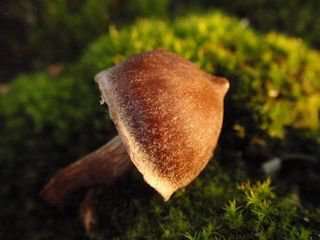

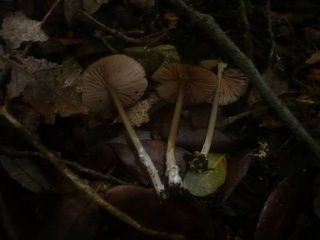

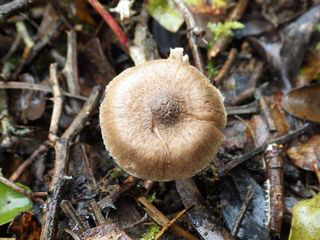

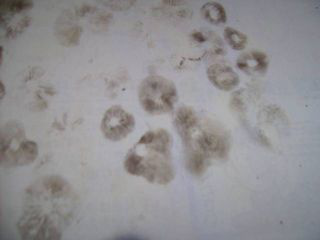

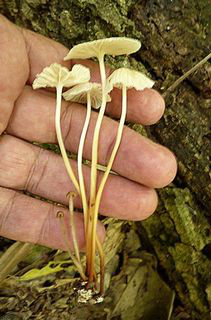

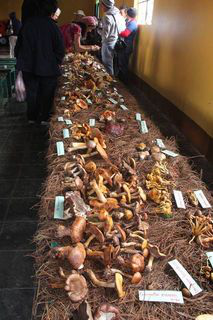

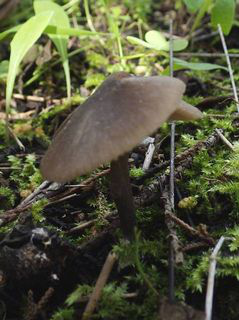

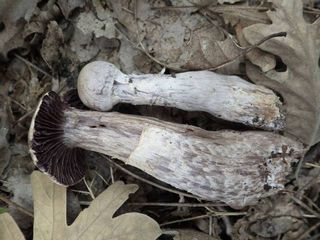

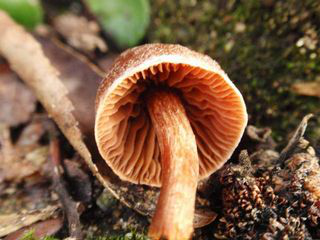

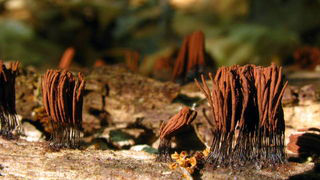

In [41]:
for fig in data.x[idxs][:10]:
    display(fig)

## Resnet50

In [6]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//4).normalize(imagenet_stats)

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


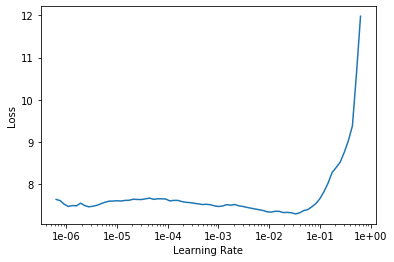

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(60)

KeyboardInterrupt: 

In [10]:
learn.fit_one_cycle(4)

In [11]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(6, max_lr=slice(3e-3, 1e-2))

KeyboardInterrupt: 

In [6]:
MODEL_PATH = Path("../mushroom_api/models")
learn = load_learner(MODEL_PATH, "resnet34_min100figs_vote1_5.pkl")

### 100 most popular species without unknown and random split

In [3]:
bs = 32

In [4]:
path = Path("/home/alan/Desktop/personal_professional/fastai/mushroom_classifier")

In [27]:
ds_tfms = get_transforms()

In [28]:
data = (ImageList.from_csv(path / "images/320",
                          "../../resources/ds4_100mostPopSpecies.csv", cols="image_id",
                          suffix='.jpg')
        #.split_from_df("is_validation")
        .split_by_rand_pct(0.2)
        .label_from_df("preferred_name")
        .transform(tfms=ds_tfms, size=300)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [29]:
print(data.classes)

['Agaricus augustus', 'Agaricus xanthodermus', 'Aleuria aurantia', 'Amanita amerirubescens', 'Amanita augusta', 'Amanita brunnescens', 'Amanita calyptroderma', 'Amanita flavoconia', 'Amanita muscaria', 'Amanita phalloides', 'Amanita velosa', 'Armillaria mellea', 'Armillaria tabescens', 'Artomyces pyxidatus', 'Auriscalpium vulgare', 'Bolbitius titubans', 'Boletus edulis', 'Cantharellus cinnabarinus', 'Cantharellus formosus', 'Cantharellus lateritius', 'Ceratiomyxa fruticulosa', 'Cerioporus squamosus', 'Chlorophyllum molybdites', 'Coprinellus micaceus', 'Coprinus comatus', 'Crucibulum laeve', 'Cryptoporus volvatus', 'Dacrymyces chrysospermus', 'Entoloma abortivum', 'Flammulina velutipes', 'Fomitopsis betulina', 'Fomitopsis mounceae', 'Fomitopsis pinicola', 'Fuligo septica', 'Galerina marginata', 'Ganoderma applanatum', 'Ganoderma oregonense', 'Ganoderma tsugae', 'Gliophorus psittacinus', 'Gloeophyllum sepiarium', 'Grifola frondosa', 'Hericium coralloides', 'Hericium erinaceus', 'Hygropho

In [30]:
data.c

100

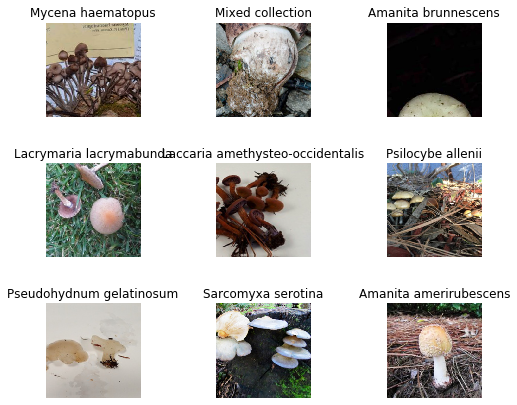

In [31]:
data.show_batch(rows=3, figsize=(7, 6))

### Training

#### Resnet 34

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 3.98E-03


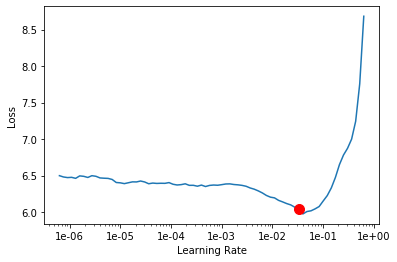

In [33]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
learn.fit_one_cycle(1, max_lr=3e-3)

In [35]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-05
Min loss divided by 10: 2.75E-05


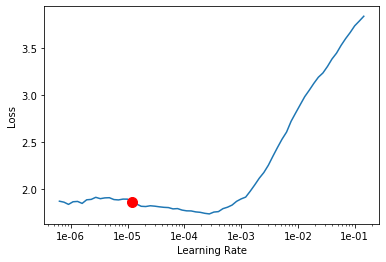

In [36]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [37]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

In [38]:
learn.save("../../../resources/models/resnet34_ds4_100topSpecies_randomSplit_img")

### 100 most popular species without unknown and observation split

In [39]:
bs = 32

In [40]:
path = Path("/home/alan/Desktop/personal_professional/fastai/mushroom_classifier")

In [41]:
ds_tfms = get_transforms()

In [44]:
data = (ImageList.from_csv(path / "images/320",
                          "../../resources/ds4_100mostPopSpecies.csv", cols="image_id",
                          suffix='.jpg')
        .split_from_df("is_validation")
        .label_from_df("preferred_name")
        .transform(tfms=ds_tfms, size=300)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [45]:
print(data.classes)

['Agaricus augustus', 'Agaricus xanthodermus', 'Aleuria aurantia', 'Amanita amerirubescens', 'Amanita augusta', 'Amanita brunnescens', 'Amanita calyptroderma', 'Amanita flavoconia', 'Amanita muscaria', 'Amanita phalloides', 'Amanita velosa', 'Armillaria mellea', 'Armillaria tabescens', 'Artomyces pyxidatus', 'Auriscalpium vulgare', 'Bolbitius titubans', 'Boletus edulis', 'Cantharellus cinnabarinus', 'Cantharellus formosus', 'Cantharellus lateritius', 'Ceratiomyxa fruticulosa', 'Cerioporus squamosus', 'Chlorophyllum molybdites', 'Coprinellus micaceus', 'Coprinus comatus', 'Crucibulum laeve', 'Cryptoporus volvatus', 'Dacrymyces chrysospermus', 'Entoloma abortivum', 'Flammulina velutipes', 'Fomitopsis betulina', 'Fomitopsis mounceae', 'Fomitopsis pinicola', 'Fuligo septica', 'Galerina marginata', 'Ganoderma applanatum', 'Ganoderma oregonense', 'Ganoderma tsugae', 'Gliophorus psittacinus', 'Gloeophyllum sepiarium', 'Grifola frondosa', 'Hericium coralloides', 'Hericium erinaceus', 'Hygropho

In [46]:
data.c

100

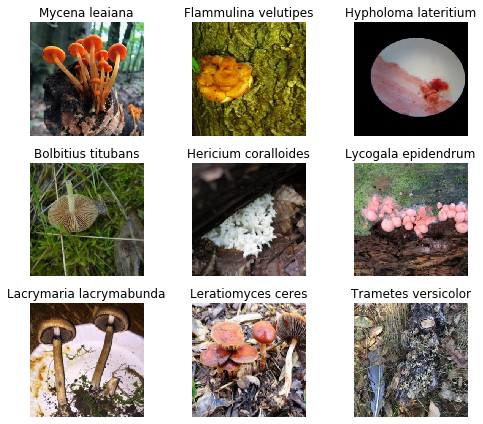

In [47]:
data.show_batch(rows=3, figsize=(7, 6))

### Training

#### Resnet 34

In [48]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, top_k_accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 5.75E-03


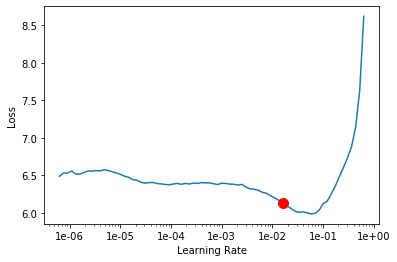

In [49]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [50]:
learn.fit_one_cycle(1, max_lr=3e-3)

In [51]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.58E-07


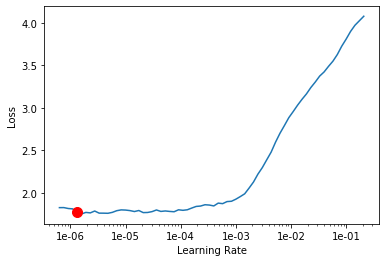

In [52]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [53]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

In [54]:
learn.save("../../../resources/models/resnet34_ds4_100topSpecies_obsSplit_img")

## Ignore the following:

In [7]:
import PIL

In [34]:
im = PIL.Image.open("/home/alan/Desktop/Clavariadelphus_truncatus.jpg")

In [35]:
image = pil2tensor(im.convert("RGB"), np.float32).div_(255)

In [12]:
import fastai

In [36]:
image = fastai.vision.image.Image(image)

In [37]:
cat, shape, ten = learn.predict(image.resize(300))

In [38]:
cat

Category Phallus rubicundus

In [55]:
ten.topk(5)

torch.return_types.topk(
values=tensor([0.4389, 0.1195, 0.0444, 0.0406, 0.0122]),
indices=tensor([856, 760, 696, 138, 180]))

In [60]:
[(learn.data.classes[idx], float(prob) * 100) for idx, prob in zip(ten.topk(5).indices, ten.topk(5).values)]

[('Phallus rubicundus', 43.893614411354065),
 ('Mutinus elegans', 11.951496452093124),
 ('Leratiomyces ceres', 4.443516582250595),
 ('Battarrea phalloides', 4.058446362614632),
 ('Boletus subvelutipes', 1.2153448536992073)]

In [54]:
learn.data.classes[180]

'Boletus subvelutipes'

In [61]:
347987. / 621850

0.5595995818927394